# Scientific Python Bootcamp Day 2
Prepared and presented by John Russell johnrussell@g.harvard.edu

2021 Spring Version of this notebook is available on [GitHub](https://github.com/Hekstra-Lab/scientific-python-bootcamp)

### Topics for the day
- Review of numpy and matplotlib basics from day 1
- More plotting - Labelling things
- Advanced indexing - Argmax and Binary indexing
- Random number generation 
- Random walks

### Review: Essentials of numpy and plotting

Let's consider the function

$$ f(x) = x e^{-\frac{x^2}{2}}\cos(x)  \hspace{8pt} \text{for} -4 \leq x \leq 4.$$

By way of a review we will

1. Make an array to represent the values of this function.
1. Plot this function
1. Identify the maximum and the location of the maximum.
1. Identify the minimum and the location of the minimum.

First new skill: Binary Indexing

Final task: Color the function according to the location of the maximum and minimum

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [228]:
# 1. Making the arrays
x0 = np.linspace(-4,4,250)
y0 = x0*np.exp(-x0**2/2)*np.cos(x0)

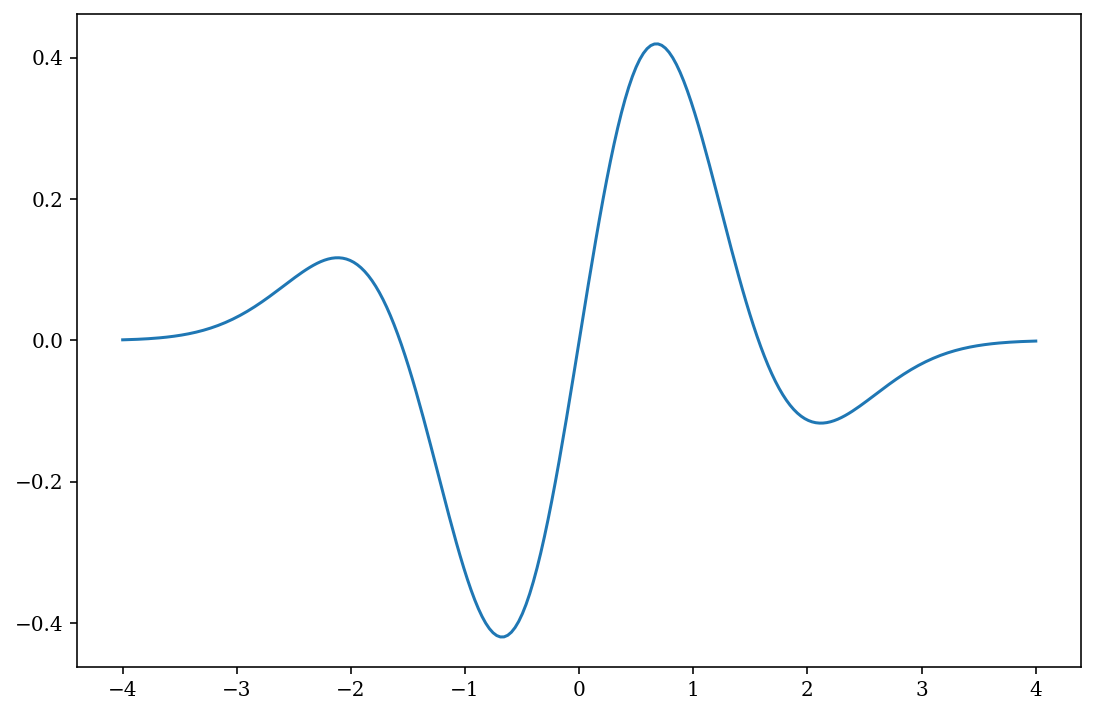

In [229]:
# 2. Making basic plots
plt.plot(x0, y0)
plt.show()

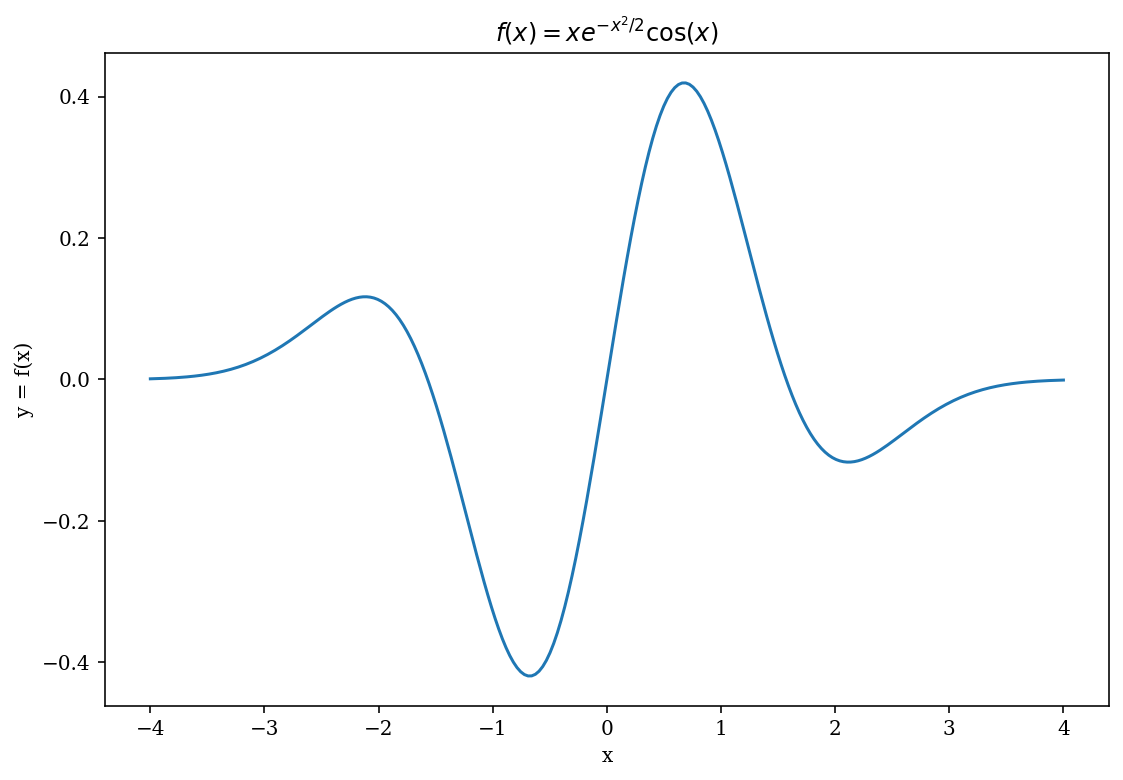

In [239]:
# Improved plot
plt.plot(x0, y0)
plt.title("$f(x) = x e^{-x^2/2} \cos(x)$")
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.show()

In [230]:
#Find the maximum
ymax = np.max(y0)
ymax

0.41940704967923204

In [234]:
#google "numpy position of max"
max_idx = np.argmax(y0)
xmax = x0[max_idx]

In [235]:
ymin = y0.min()
min_idx = np.argmin(y0)
xmin = x0[min_idx]

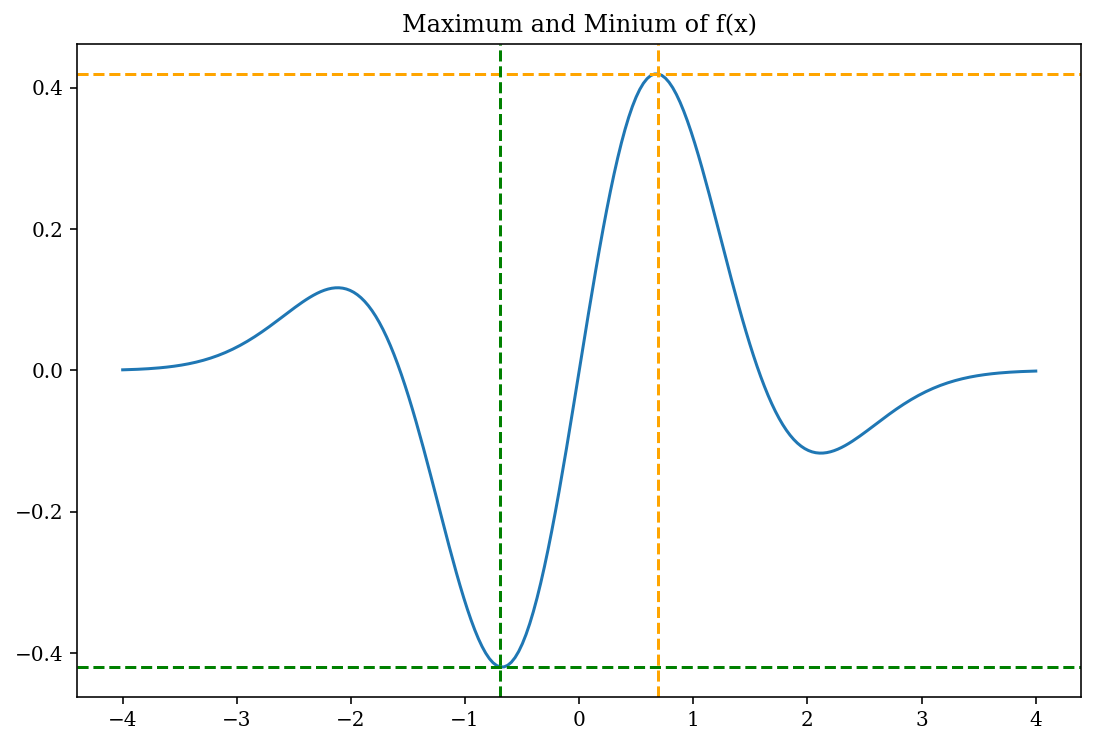

In [236]:
plt.plot(x0, y0)
plt.axvline(xmax, ls='--', c='orange')
plt.axhline(ymax, ls='--', c='orange')
plt.axvline(xmin, ls='--', c='green')
plt.axhline(ymin, ls='--', c='green')
plt.title(f"Maximum and Minium of f(x)")
plt.show()

### Indexing with Binary Masks

In [247]:
arr = np.arange(20).reshape(4,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

Recall from yesterday's session all the ways we have seen to access elements of this array 

In [248]:
# Specific index
arr[2, 4]

14

In [250]:
# Slices
arr[1:3,1:4]

array([[ 6,  7,  8],
       [11, 12, 13]])

In [252]:
# Using other arrays
arr[np.array([1,3]), np.array([2,4])]

array([ 7, 19])

In [254]:
# More use of other arrays - get the diagonal
arr[np.arange(4), np.arange(4)]

array([ 0,  6, 12, 18])

Also recall that we can do mathematical operations on entire arrays. 

In [255]:
2*arr - 3

array([[-3, -1,  1,  3,  5],
       [ 7,  9, 11, 13, 15],
       [17, 19, 21, 23, 25],
       [27, 29, 31, 33, 35]])

We can also do *logical operations* on arrays. The output of logical operations will be boolean arrays, arrays that only contain `True` or `False` elements.

In [273]:
print(arr)
print()
print(arr > 10)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

[[False False False False False]
 [False False False False False]
 [False  True  True  True  True]
 [ True  True  True  True  True]]


In [262]:
evens = arr%2==0

In [263]:
print(arr)
print()
print(evens)# % is the modulo operator, x%y gives the remainder when x is divided by y.

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

[[ True False  True False  True]
 [False  True False  True False]
 [ True False  True False  True]
 [False  True False  True False]]


If we index the array with a boolean array of compatible shape, we can access the elements where the boolean array is `True`.

In [265]:
arr[evens]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

### Final task

Lets return to the function from earlier to put binary indexing to some use. Recall that have found the locations of the minium, which we will call $x_{min}$ and $x_{max}$.

In [274]:
print("y_min = ", ymin)
print("x_min = ", xmin)

y_min =  -0.41940704967923204
x_min =  -0.6907630522088355


Now we will make make a plot that shows $f(x)$ according to the following colorscheme: 

- Blue, where $x < x_{min}$
- Green, where $x \geq x_{min}$

as can be seen below.

<img src="figures/color_graph.png" width = 400px>

We will proceed as follows:
1. Get the $x$ values that are less than $x_{min}$
2. Get the corresponding $y$ values
1. Get the $x$ values that are greater than $x_{min}$
2. Get the corresponding $y$ values
1. Plot

In [282]:
# Get x values less than xmin
less_than_xmin = x0<xmin
less_than_xmin

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [283]:
x_less = x0[less_than_xmin]

In [284]:
# Get y values that correspond to x<xmin
y_less = y0[less_than_xmin]

*Note:* Even though the criterion for selecting points depends on the x value, since `x0` and `y0` are the same shape, we can index `y0` using the same binary array.

In [285]:
# Repeat process for x > xmin
greater_than_xmin = x0>xmin
x_greater = x0[greater_than_xmin]
y_greater = y0[greater_than_xmin]

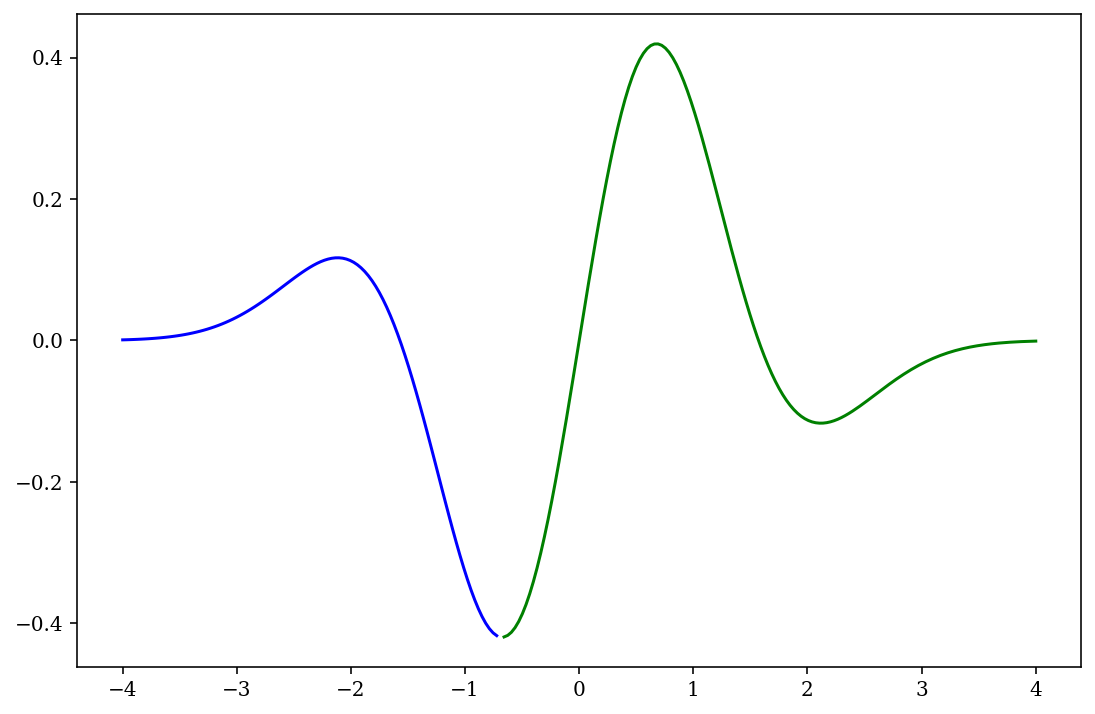

In [286]:
# Plot them
plt.plot(x_less, y_less, color='blue')
plt.plot(x_greater, y_greater, color='green')
plt.show()

## Exercise 1

This exercise is desinged to review what you learned yesterday and to begin to practice boolean indexing.

The cell below generates two arrays: 
- `x` is the dependent variable which we will use for plotting
- `y` is a 2-dimensional array that contains the values of 10 different functions of x, each one in its own column

Below is a pictorial representation of what the array `y` contains.

<img src=figures/y_table.png width=600px>

The following cell makes a plot of all 10 different columns of `y`.

In [243]:
x = np.linspace(-1,1, 300)
# Dont worry about the details of the next two lines, this is just easier than downloading data.
rng = np.random.default_rng(12345) 
y = np.vander(x,7)@rng.standard_normal((7, 10)) 

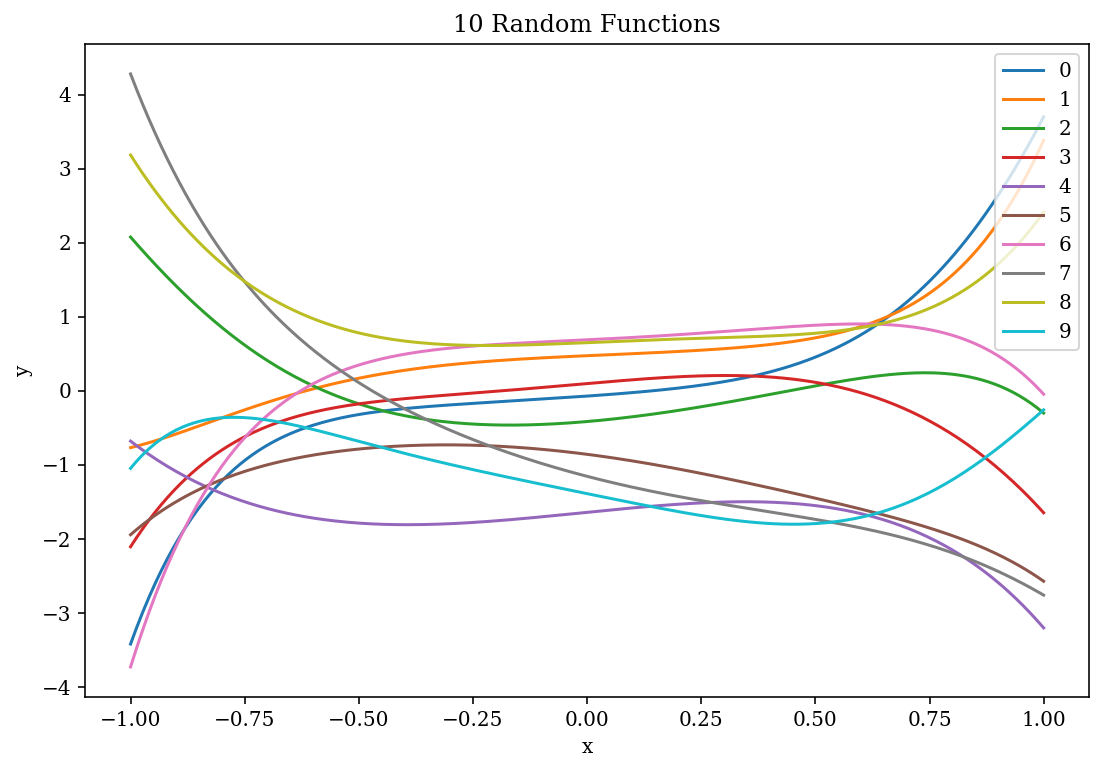

In [245]:
for i in range(10):
    plt.plot(x, y[:,i], label=i)
plt.title("10 Random Functions")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Part a.

Compute the average value of y for each of the 10 different functions, in other words, the average of each column. Which column has the largest average and which one has the smallest? *Do not use any loops for this problem!*

*Hints*
1.  A super loopy implementation would probably look something like:
```
rows, cols = y.shape()
means = np.zeros(cols)
for i in range(cols):
    total = 0
    for j in range(rows):
         total += y[j,i]
    means[i] = total/rows
```

1. If you start with that code, try eliminating the inner loop with a call to a numpy function first. Then get rid of the outer loop. It is possible to compute the average of the columns in a single line of numpy code.

### Part b.

Make a plot showing the curves with the largest and smallest average values that you found in part a on the same axes. Include a legend that lists the average value of each curve as well as its index in the original array.

### Part c.

Compute the difference between the first and last point of each of the columns of y, in the notation of the image above this is $d_i = y_i(x_{299}) - y_i(x_0)$ for $0\leq i < 10$. Which column has the largest difference and which has the smallest?

### Part d.

Make a plot showing the curves with the largest and smallest net differences that you found in part c on the same axes. Include a legend that lists the average value of each curve. 

#### Part e.

For the curve at index 2 ($y_2(x)$ in the notation of the table), make a plot in which the curve is is colored blue where the function is positive and red where it is negative.

*Hint* you will need to use the same binary masks to index `x` and `y`.

## Random numbers and random walks

Random number generation is a surprisingly tricky thing to do on a computer which we generally think of as highly non-random. Strictly speaking, we will be talking about *pseudo*random number generation since its impossible to genereate truly random numbers. However it is important enough that lots work has gone into doing it well and many of the best implementations live in the `numpy.random` module.

*Note*: The `numpy.random` module was changed significantly in summer of 2019 so what you'll see today is the modern usage. For compatibility reasons, numpy still supports the old way and you may well come across older code which will look slightly different.

The core of the random module is a `Generator` object. The easiest and most likely best way to initialize one is

In [ ]:
rng = np.random.default_rng() #rng stands for Random Number Generator

The `Generator` object can then generate numbers from a vast array of different distributions. You can learn about these in a statistics class but I'll show a few examples.

In [ ]:
normal_samples = rng.normal(loc=10, scale=20, size=1000)

In [ ]:
gamma_samples = rng.gamma(2, 4, size=1000)

In [ ]:
pets = ['cat', 'dog', 'fish', 'rabbit']
choice_samples = rng.choice(pets, size=5)

In [ ]:
choice_samples

#### Random Walks

Random walks are a *very* powerful and widely used model in basically every area of science. One of the great things about random walks is that they are very easy to simulate and often analytically tractable though the math is much beyond the scope of this bootcamp. What is random walk?

Here is the idea: a walker starts at some point and at each time point takes a "random step." There are many ways to define a random step. 
- The original way as suggested by Pearson was in 2D, to take a step of fixed length but to randomly choose a direction. 
- Alternatively in 1D you could perform a "coin flip" and decide to take a step of fixed length to either the left or right.
- Finally you could choose a step from a probability distribution. 

Typically, we simulate many random walkers and compile statistics based on the set of walkers. Lets compute option 2 in numpy. 

In [ ]:
steps = rng.choice([-1,1], size=(1000,100)) #1000 steps or time points, 100 walkers

In [ ]:
positions = steps.cumsum(0)

In [ ]:
plt.plot(positions[:,:10])
plt.title("10 Random Walks")
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

#### Compiling statistics

In [ ]:
mean = positions.mean(1)
std = positions.std(1)

In [ ]:
plt.plot(std, label="Std. Dev.")
plt.plot(mean, label='Mean')
#fit standard deviation
plt.legend()
plt.show()

The fact that the standard deviation grows like $\sqrt{t}$ is a hallmark feature of many types of random walks.

In [ ]:
only_positive = np.all(positions>0, axis=0)

In [ ]:
positive_walkers = positions[:,only_positive]

In [ ]:
plt.plot(positive_walkers)

### Exercise 2

*Note* Since we are generating random numbers your individual results may be different. 


#### Part a.

Similate 100 random walkers each taking 1000 steps as above but rather than a "coin flip" to determine the step, have these walkers take a step to the right (+1) with probability 0.65 and a step to the left (-1) with probability 0.35. Make plot showing the trajectories of the walkers which ended up farthest from the origin and closest to the origin.

#### Part b.

- Compute the mean and standard deviation of these walkers as a function of time. 
- Plot the mean and standard deviation as a function of time on the same axes. 
- Plot $\sqrt{t}$ as above and plot on the same axes. Does it still seem to fit?
- Can you come up with a function that describes the mean as a function of time? Plot this function as well. *Hint* How do you think the average depends on the probability of going right? Does your formula give the correct result from the demo above when $p=0.5$?

#### Part c. 

Rather than just walking up and down the number line, lets see what happens when the walk happens in two dimensions. Simulate 100 walkers each taking 1000 steps in the XY plane. Generate a 2D step by taking 2 independent samples from a standard normal distribution (mean=0, standard deviation=1). Plot 10 walks *in the XY plane*.

In [319]:
walks2d = rng.standard_normal(size=(2,1000,100)).cumsum(1)

In [ ]:
plt.plot(walks2d[0,:,:10], walks2d[1,:,:10])
plt.show()

#### Part d.

Find the walkers which end up the farthest from the origin and the closest. Plot these two trajectories in the XY plane. *Hint* Given a point $(x,y)$ how do you compute the distance from the origin?

In [ ]:
R = np.sqrt(walks2d[0]**2 + walks2d[1]**2)

In [270]:
farthest = R[-1].argmax()
closest = R[-1].argmax()

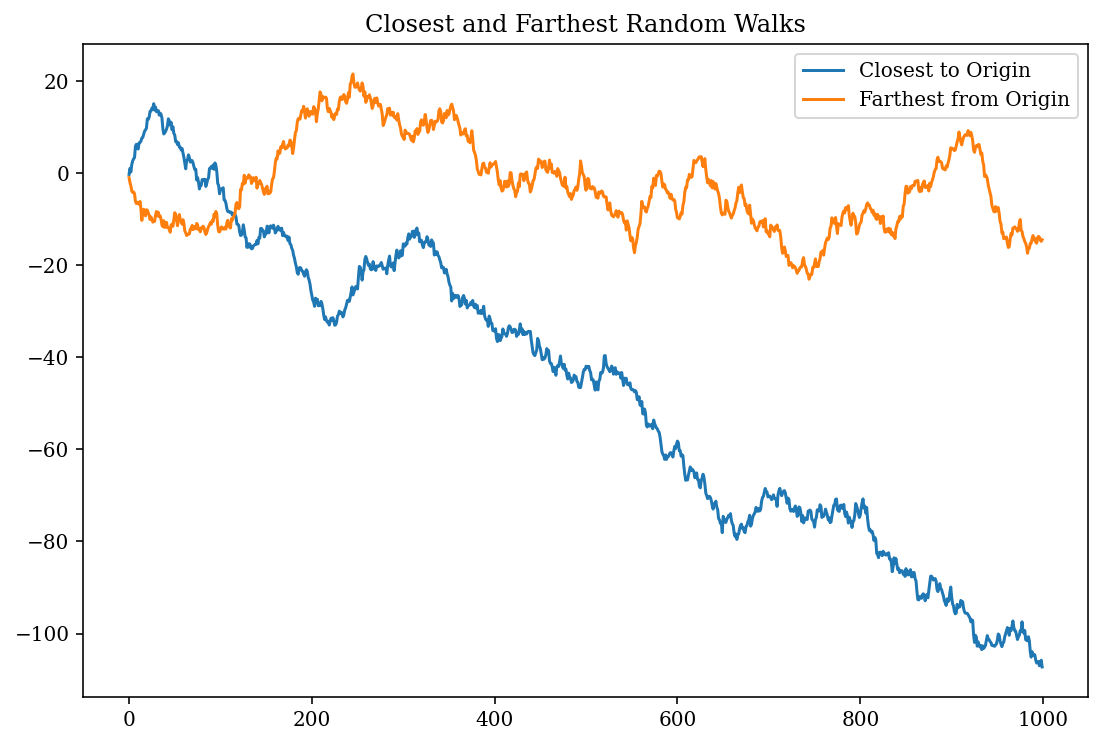

In [272]:
plt.plot(walks2d[0, :,closest], label="Closest to Origin")
plt.plot(walks2d[1, :,farthest], label="Farthest from Origin")
plt.legend()
plt.title("Closest and Farthest Random Walks")
plt.show()

#### Part e. 

Plot the trajectories of any walkers who remain in the first quadrant for their entire trajectory (i.e. $x(t)>0$ and $y(t)>0$ for all times $t$). You will probably want to simulate more walkers in order to find some who meet this criterion, it happens with probability ~0.05\%.

*Hint* We have not discussed how to use multiple binary arrays to index. Google it!

In [326]:
big_walks2d = rng.standard_normal(size=(2, 1000,10000)).cumsum(1)

In [327]:
positive_x = np.all(big_walks2d[0]>0, axis=0)
positive_y = np.all(big_walks2d[1]>0, axis=0)

In [328]:
first_quad = big_walks2d[:,:,positive_x&positive_y]

In [330]:
print(positive_x.sum())
print(positive_y.sum())
print((positive_x*positive_y).sum())

179
196
5


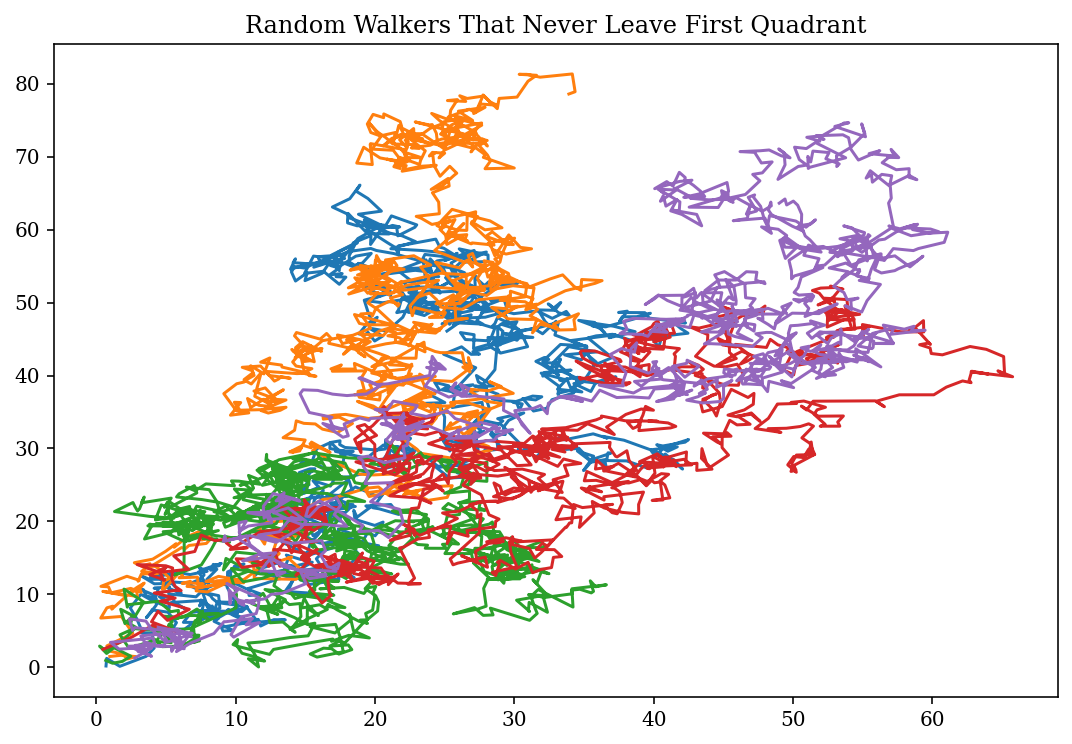

In [332]:
plt.plot(first_quad[0], first_quad[1])
plt.title("Random Walkers That Never Leave First Quadrant")
plt.show()

In [294]:
R.shape

(1000, 100)